## APS 2 - Transferência de Calor

### Luca Mizrahi, Gustavo Oliveira, Arthur Tamm

#### Tarefa 3

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K = 1 # m^2/s
alpha = 1 # m/s
T = 3 # s
Q = 100 # kg / ms
Lx = 30 # m
Ly = 20 # m
a = 1 / 1.4 # m
b = 60 / 6 # m

delta_x = 1  # m
delta_y = delta_x # m
delta_t = delta_x ** 2 / (4*K) - 0.01 # s
# delta_t
ERRO = 0.29

tempo = np.arange(0, 10*T, delta_t)

# Construir matriz de condições iniciais. Lembrando que o que é i no código é j na teoria, e vice versa.
c = int(Lx/delta_x) + 1 # numero de colunas
l = int(Ly/delta_y) + 1 # numero de linhas
C = np.zeros((l, c))

In [3]:
tempo = np.arange(0, 10*T, delta_t)
Cf = C.copy()
Cp = C.copy()

for t in range(0, len(tempo)):
    for i in range(0, l - 1):
        for j in range(0, c - 1):
            l_ = i
            c_ = j
            if i==0:
                c_=1
            if i==l-1:
                c_=l-2
            if j==0:
                l_=1
            if j==c-1:
                l_=c-2
            if t > T:
                qc = 0
            if( abs(l_- b) <= ERRO and abs(c_- a) <= ERRO ):
                # print('entrei na condicao wow!')
                qc = Q / (delta_x * delta_y) # kg / ms
            else: 
                qc = 0

            t1 = (Cp[l_][c_+1] - Cp[l_][c_-1]) / (2*delta_x)
            t2 = np.sin(np.pi/5 * c_) * (Cp[l_+1][c_] - Cp[l_-1][c_]) / (2*delta_y)
            t3 = (Cp[l_][c_+1] - 2*Cp[l_][c_] + Cp[l_][c_-1]) / (delta_x**2)
            t4 = (Cp[l_+1][c_] - 2*Cp[l_][c_] + Cp[l_-1][c_]) / (delta_y**2)
            
            Cf[l_][c_] = Cp[l_][c_] + delta_t * (qc - alpha * (t1 + t2) + K * (t3 + t4))
            
            if Cf[l_][c_] < 0:
                Cf[l_][c_] = 0
            
    # if(Erro.mal_() < 0.0001):
    #     print('Convergiu em ', 10*t, ' ms.')
    #     break
    Cp = Cf.copy()
            

In [4]:
np.max(Cp)

31.695157203840353

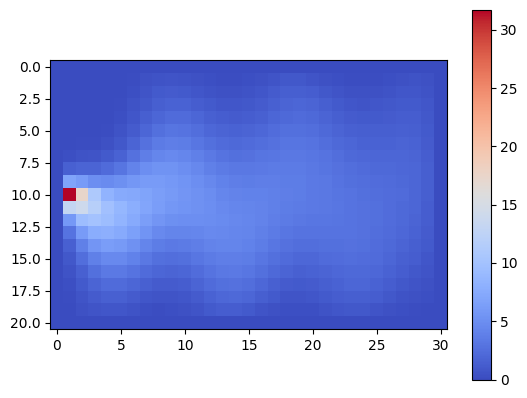

In [5]:
plt.imshow(Cf, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # Adicione uma barra de cores

# Mostre o mapa de calor
plt.show()

In [6]:
# # tempo = np.arange(0, 10, delta_t)
# Cf = C.copy()
# Cp = C.copy()
# # Erro = np.zeros((l, c))
# K = 1
# for t in range(0, len(tempo)):
#     for i in range(0, l - 1):
#         for j in range(0, c - 1):
#             x = j
#             y = i
#             if i==0:
#                 y=1
#             if i==l-1:
#                 y=l-2
#             if j==0:
#                 x=1
#             if j==c-1:
#                 x=c-2
#             if t > 3:
#                 qc = 0
#             if( abs(x-a) <= ERRO and abs(y-b) <= ERRO ):
#                 # print('entrei na condicao wow!')
#                 qc = Q / (delta_x * delta_y) # kg / ms
#             else: 
#                 qc = 0

#             termo1 = alpha*( (Cp[x+1][y] - C[x-1][y])/(2*delta_x) + np.sin(np.pi/5*j) * (Cp[x][y+1] - C[x][y-1])/(2*delta_y) )
#             termo2 = K * ( (Cp[x+1][y] - 2*C[x][y] + Cp[x-1][y])/(delta_x**2) + (Cp[x][y+1] - 2*C[x][y] + Cp[x][y-1])/(delta_y**2) )
#             Cf[x][y] = Cp[x][y] + delta_t*(qc - termo1 + termo2)
            
#             if Cf[x][y] < 0:
#                 Cf[x][y] = 0
            
#     # if(Erro.max() < 0.0001):
#     #     print('Convergiu em ', 10*t, ' ms.')
#     #     break
#     Cp = Cf.copy()

# plt.imshow(Cf, cmap='coolwarm', interpolation='nearest')
# plt.colorbar()  # Adicione uma barra de cores

# # Mostre o mapa de calor
# plt.show()
            

#### Tarefa 4

In [7]:
K_list = [1, 2, 4, 5, 8, 10]

plt.figure(figsize=(12, 8))

for index, K in enumerate(K_list):
    Cf = C.copy()
    Cp = C.copy()
    # Erro = np.zeros((l, c))
    for t in range(0, len(tempo)):
        for i in range(0, l - 1):
            for j in range(0, c - 1):
                x = j
                y = i
                if i==0:
                    y=1
                if i==l-1:
                    y=l-2
                if j==0:
                    x=1
                if j==c-1:
                    x=c-2
                if t > 3:
                    qc = 0
                if( abs(x-a) <= ERRO and abs(y-b) <= ERRO ):
                    # print('entrei na condicao wow!')
                    qc = Q / (delta_x * delta_y) # kg / ms
                else: 
                    qc = 0

                termo1 = alpha*( (Cp[x+1][y] - Cp[x-1][y])/(2*delta_x) + np.sin(np.pi/5*x) * (Cp[x][y+1] - Cp[x][y-1])/(2*delta_y) )
                termo2 = K * ( (Cp[x+1][y] - 2*Cp[x][y] + Cp[x-1][y])/(delta_x**2) + (Cp[x][y+1] - 2*Cp[x][y] + Cp[x][y-1])/(delta_y**2) )
                Cf[x][y] = Cp[x][y] + delta_t*(qc - termo1 + termo2)
                
                if Cf[x][y] < 0:
                    Cf[x][y] = 0     
        Cp = Cf.copy()

    plt.subplot(2, 3, index + 1)
    plt.imshow(Cf, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()  # Adicione uma barra de cores
    plt.title('K = ' + str(K))

    # Mostre o mapa de calor
plt.show()
            

IndexError: index 21 is out of bounds for axis 0 with size 21

<Figure size 1200x800 with 0 Axes>

Quanto maior o K, maior a difusão do poluente.